In [8]:
import numpy as np
import matplotlib.pyplot as plt


In [9]:
# Model parameters
theta = 0.05  # Mean reversion level
kappa = 0.1   # Mean reversion speed
sigma = 0.01  # Volatility

# Simulation parameters
T = 1.0       # Time to maturity (in years)
n = 1000      # Number of time steps
dt = T / n    # Time step size
r0 = 0.04     # Initial short-term interest rate

In [10]:
# Number of simulations
n_simulations = 100

# Generate random shocks
np.random.seed(0)
random_shocks = np.random.normal(0, np.sqrt(dt), (n_simulations, n))

# Simulate the Ho-Lee model for multiple scenarios
interest_rate_scenarios = []
for j in range(n_simulations):
    interest_rates = [r0]
    for i in range(n):
        dr = kappa * (theta - interest_rates[-1]) * dt + sigma * random_shocks[j, i]
        interest_rates.append(interest_rates[-1] + dr)
    interest_rate_scenarios.append(interest_rates)

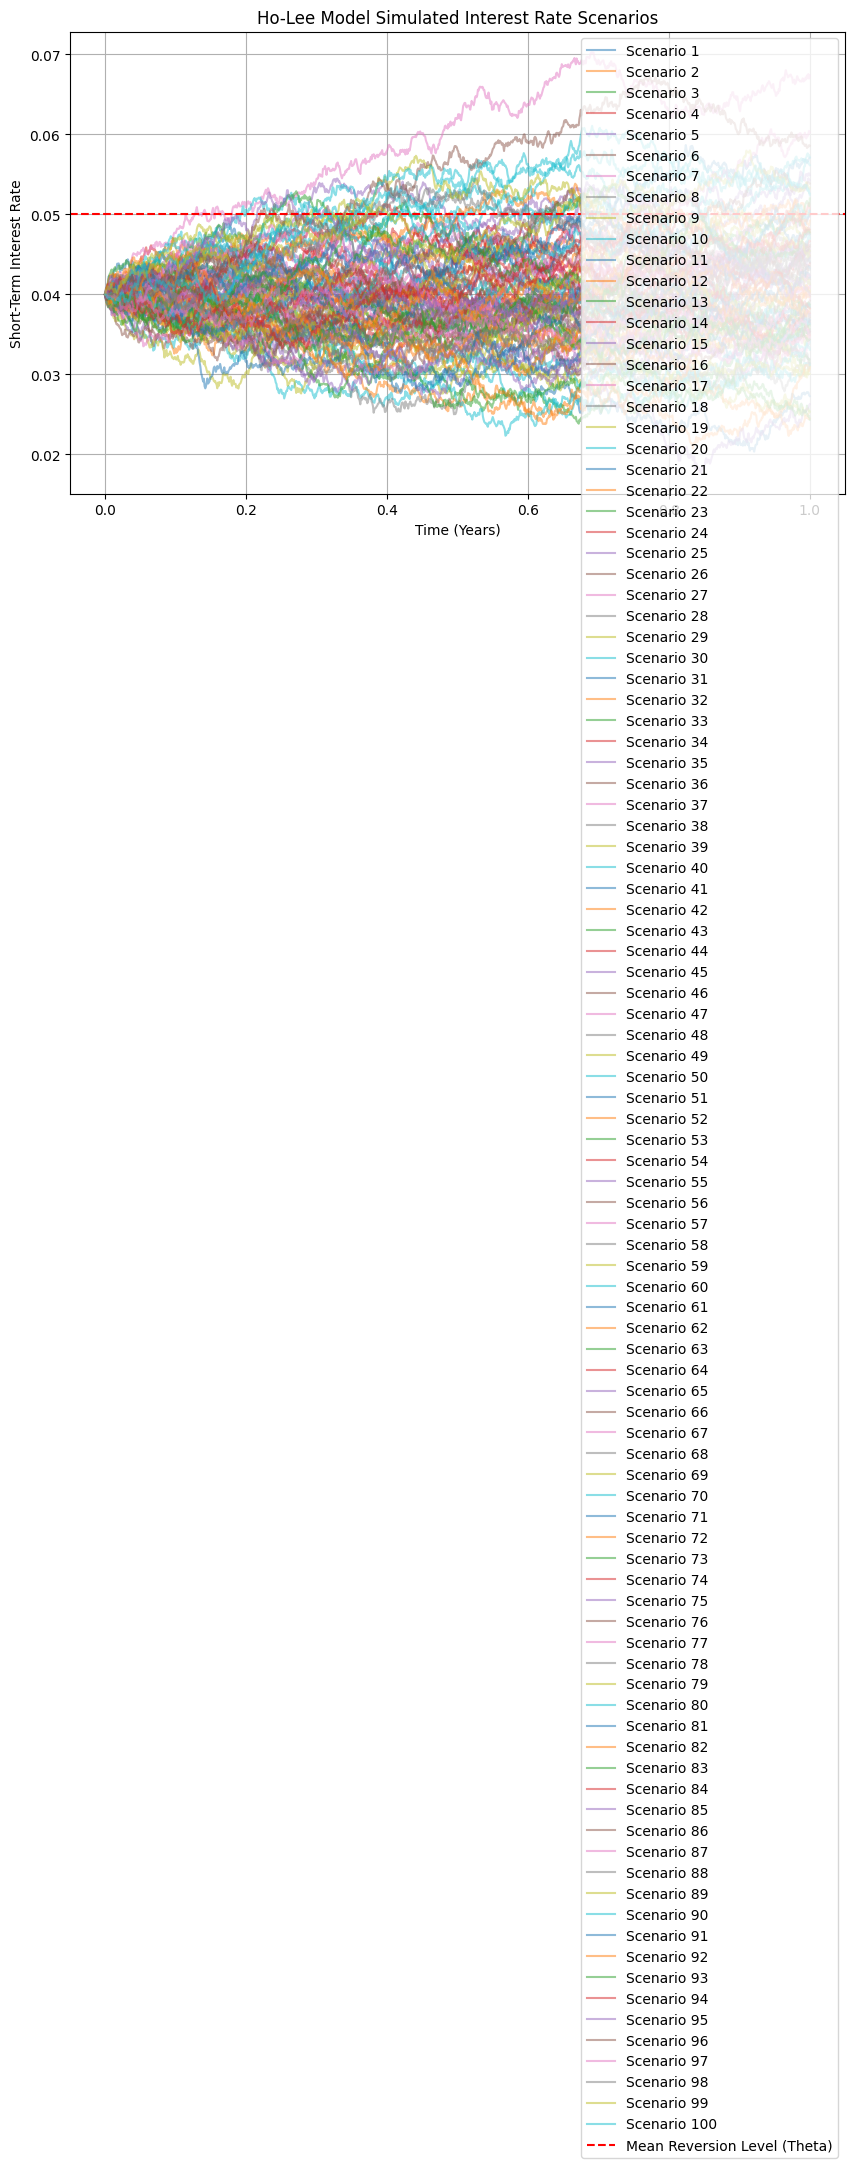

In [11]:
# Plot the simulated interest rate scenarios
plt.figure(figsize=(10, 6))
for j in range(n_simulations):
    plt.plot(np.arange(0, T + dt, dt), interest_rate_scenarios[j], alpha=0.5, label=f'Scenario {j+1}')

plt.axhline(y=theta, color='r', linestyle='--', label='Mean Reversion Level (Theta)')
plt.title('Ho-Lee Model Simulated Interest Rate Scenarios')
plt.xlabel('Time (Years)')
plt.ylabel('Short-Term Interest Rate')
plt.legend()
plt.grid(True)
plt.show()